# Check whether the bank customer stays or not!

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [109]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [110]:
df.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfP

In [111]:
x = df.iloc[:,3:13]
y = df.iloc[:,13]

In [112]:
x.isnull().sum()


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [113]:
y.isnull().sum()

0

In [114]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [115]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [116]:
gender = pd.get_dummies(x["Gender"],drop_first=True,dtype=int)

In [117]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [118]:
geography = pd.get_dummies(x["Geography"],dtype=int)

In [119]:
geography

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [120]:
x = pd.concat([x,gender,geography],axis=1)

In [121]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,France,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,1,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,1,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,1,1,0,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,1,1,0,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,1,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [122]:
x = x.drop(["Gender","Geography"],axis=1)

In [123]:
x.shape

(10000, 12)

In [124]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,France,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,1,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,0,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [125]:
from sklearn.model_selection import train_test_split

In [126]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [127]:
x_train= sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [128]:
import tensorflow as tf
tf.random.set_seed(10)
from tensorflow import keras
#Do the other method as well

In [129]:
import keras
x_train.shape

(8000, 12)

In [130]:
from keras.models import Sequential
from keras.layers import Dense

In [131]:
model = Sequential()

In [132]:
model.add(Dense(6,activation="relu",kernel_initializer="he_uniform",input_dim=12))

In [133]:
model.add(Dense(6,activation="relu",kernel_initializer="he_uniform"))

In [134]:
model.add(Dense(1,kernel_initializer="glorot_uniform",activation="relu"))
model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [135]:
model_history = model.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=10)

Epoch 1/10
536/536 [==============================] - 2s 2ms/step - loss: 2.6684 - accuracy: 0.7897 - val_loss: 2.1309 - val_accuracy: 0.8005
Epoch 2/10
536/536 [==============================] - 1s 2ms/step - loss: 1.8282 - accuracy: 0.7845 - val_loss: 1.4058 - val_accuracy: 0.7887
Epoch 3/10
536/536 [==============================] - 1s 2ms/step - loss: 1.3961 - accuracy: 0.7837 - val_loss: 1.2358 - val_accuracy: 0.7967
Epoch 4/10
536/536 [==============================] - 1s 2ms/step - loss: 1.2538 - accuracy: 0.7862 - val_loss: 1.1148 - val_accuracy: 0.7880
Epoch 5/10
536/536 [==============================] - 1s 2ms/step - loss: 1.0955 - accuracy: 0.7794 - val_loss: 1.0330 - val_accuracy: 0.7952
Epoch 6/10
536/536 [==============================] - 1s 2ms/step - loss: 0.9651 - accuracy: 0.7800 - val_loss: 0.7943 - val_accuracy: 0.7846
Epoch 7/10
536/536 [==============================] - 1s 2ms/step - loss: 0.8166 - accuracy: 0.7776 - val_loss: 0.7567 - val_accuracy: 0.7936
Epoch 

In [94]:
# my method better 


In [104]:
model2 = keras.Sequential([
            keras.layers.Flatten(input_shape=(12,)),
            keras.layers.Dense(6,activation='relu',kernel_initializer="he_uniform"),
            keras.layers.Dense(6, activation='relu',kernel_initializer="he_uniform"),
            keras.layers.Dense(1,activation='sigmoid',kernel_initializer="glorot_uniform")
])

In [105]:
model2.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [107]:
history = model2.fit(x_train,y_train,validation_split=0.1,epochs=50)

Epoch 1/50
225/225 [==============================] - 0s 1ms/step - loss: 0.3774 - accuracy: 0.8328 - val_loss: 0.3330 - val_accuracy: 0.8450
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.3737 - accuracy: 0.8400 - val_loss: 0.3314 - val_accuracy: 0.8562
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.3708 - accuracy: 0.8443 - val_loss: 0.3284 - val_accuracy: 0.8562
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.3674 - accuracy: 0.8489 - val_loss: 0.3257 - val_accuracy: 0.8550
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.3640 - accuracy: 0.8514 - val_loss: 0.3245 - val_accuracy: 0.8575
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.3609 - accuracy: 0.8525 - val_loss: 0.3232 - val_accuracy: 0.8537
Epoch 7/50
225/225 [==============================] - 0s 1ms/step - loss: 0.3586 - accuracy: 0.8532 - val_loss: 0.3204 - val_accuracy: 0.8637
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


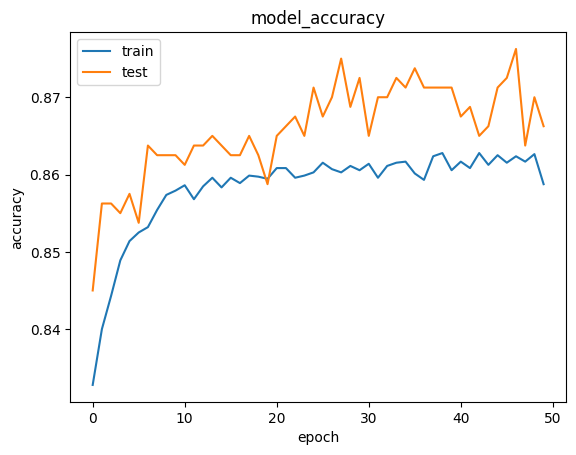

In [137]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

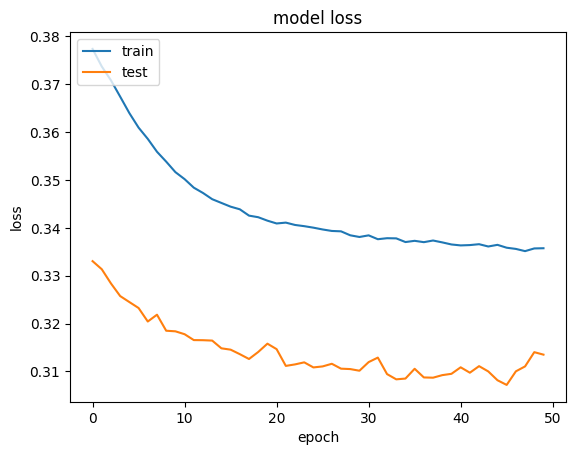

In [138]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [141]:

y_pred = model2.predict(x_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 842us/step


In [142]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1525,   92],
       [ 207,  176]], dtype=int64)

In [143]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8505